Cristel Irwin 

In [167]:
#install.packages("leaflet")


In [170]:
#install.packages("ggplot2")

In [171]:
#install.packages("psych")

In [172]:
#install.packages('rgl')

In [141]:
library ('ggplot2')
library ('corrplot')
library('tidyverse')
library('leaflet')
library ('psych')
library ('dplyr')
library ('Hmisc')
library('ggExtra')

# Objective:


The report will attempt to find correlations between happiness and given variables such as a country's GDP per capita, health life expectancy, freedom to make life choices, perceived generosity of a society, and perceptions of corruption in a government. The report will also explore country happiness ratings per year for the years 2015-2020. Additionally, this report will feature descriptions of our findings as well as accompanying visual representations.

Lastly, the a formal report will be provided to the UNWTO with the summary of the report with 10 paragraphs. The final report will provide a list of countries ranked by "happiness score", as well as make recommendations on how to use the data provided for future marketing campaigns.

In [7]:
World_Happiness_2015 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2015.csv")

In [8]:
World_Happiness_2016 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2016.csv")

In [9]:
World_Happiness_2017 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2017.csv")

In [10]:
World_Happiness_2018 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2018.csv")

In [11]:
World_Happiness_2018.na <- na.omit(World_Happiness_2018)
head(World_Happiness_2018.na, 5)

Country,Happiness.Score,GDP.Per.Capita,Health.Life.Expectancy,Freedom.to.Make.Life.Choices,Generosity,Perceptions.of.Corruption,Year
Finland,7.632,1.305,0.874,0.681,0.202,0.393,2018
Norway,7.594,1.456,0.861,0.686,0.286,0.340,2018
Denmark,7.555,1.351,0.868,0.683,0.284,0.408,2018
Iceland,7.495,1.343,0.914,0.677,0.353,0.138,2018
Switzerland,7.487,1.420,0.927,0.660,0.256,0.357,2018


In [12]:
World_Happiness_2019 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2019.csv")

In [13]:
World_Happiness_2020 <- read.csv("C:/Users/Sandy/Desktop/R CSV FILES/2020.csv")

# Data Exploration 
Since we will merge six data frames from 2015-2020, we must first check that the dimensions and columns names of each data set match. We are only comparing data from the following columns: Country', 'Happiness.Score', 'GDP.Per.Capita', 'Health.Life.Expectancy', 'Freedom.to.Make.Life.Choices', 'Generosity', 'Perceptions.of.Corruption', & 'Year'. We then implemented the pars() function to check for any correlations. There already seem to be several. We then ran the str() command to check what categories our variables fall into.

In [14]:
#dim(World_Happiness_2015)

In [15]:
#colnames(World_Happiness_2015)

In [16]:
#dim(World_Happiness_2016)

In [17]:
#colnames(World_Happiness_2016)

In [18]:
#dim(World_Happiness_2017)

In [19]:
#colnames(World_Happiness_2017)

In [20]:
#dim(World_Happiness_2018.na)

In [21]:
#colnames(World_Happiness_2018.na)

In [22]:
#dim(World_Happiness_2019)

In [23]:
colnames(World_Happiness_2019)

[1] "Country"                      "Happiness.Score"             
[3] "GDP.Per.Capita"               "Health.Life.Expectancy"      
[5] "Freedom.to.Make.Life.Choices" "Generosity"                  
[7] "Perceptions.of.Corruption"    "Year"

In [24]:
dim(World_Happiness_2020)

[1] 153   8

In [25]:
##Code to combine datatsets
World_Happiness_1 <- rbind(World_Happiness_2015, World_Happiness_2016)

In [26]:
##Code to combine datatsets
World_Happiness_2 <- rbind(World_Happiness_2017, World_Happiness_1)

In [27]:
#as.numeric(World_Happiness_2018$Perceptions.of.Corruption)

In [28]:
##Code to combine datatsets
World_Happiness_3 <- rbind(World_Happiness_2018.na, World_Happiness_2)

In [29]:
##Code to combine datatsets
World_Happiness_4 <- rbind(World_Happiness_2019, World_Happiness_3)

In [30]:
##Code to combine datatsets
World_Happiness_correlations <- rbind(World_Happiness_4, World_Happiness_2020)

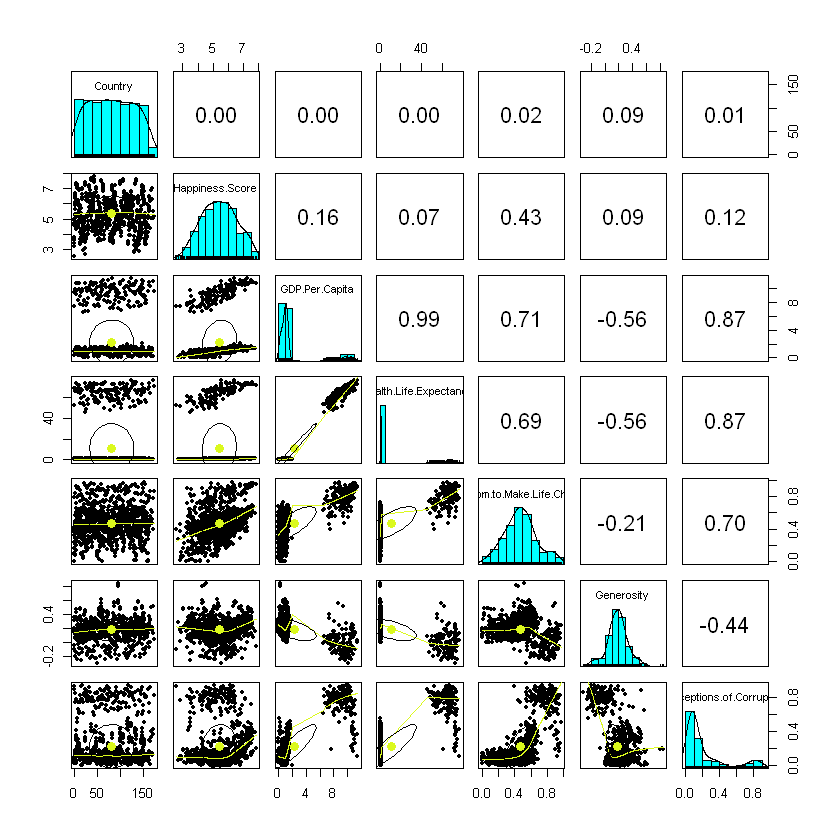

In [31]:
#Data Exploration
pairs.panels(World_Happiness_correlations[1:7], col="#DBF91D")

In [32]:
str(World_Happiness_correlations)

'data.frame':	935 obs. of  8 variables:
 $ Country                     : Factor w/ 172 levels "Afghanistan",..: 44 37 106 58 99 134 133 100 24 7 ...
 $ Happiness.Score             : num  7.77 7.6 7.55 7.49 7.49 ...
 $ GDP.Per.Capita              : num  1.34 1.38 1.49 1.38 1.4 ...
 $ Health.Life.Expectancy      : num  0.986 0.996 1.028 1.026 0.999 ...
 $ Freedom.to.Make.Life.Choices: num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ Generosity                  : num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ Perceptions.of.Corruption   : num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...
 $ Year                        : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...


In [33]:
colnames(World_Happiness_2020)

[1] "Country"                      "Happiness.Score"             
[3] "GDP.Per.Capita"               "Health.Life.Expectancy"      
[5] "Freedom.to.Make.Life.Choices" "Generosity"                  
[7] "Perceptions.of.Corruption"    "Year"

In [34]:
Happiest_Countries <- subset(World_Happiness_correlations, World_Happiness_correlations$Happiness.Score>=7.5 & World_Happiness_correlations$Happiness.Score<9)

In [173]:
#head(Happiest_Countries, 20)

# Pie Chart
Just for fun, we created a pie chart that shows the top 20 Happiest Countries from 2016-2020. Countries were considered "Happiest" when rated by the value of their GDP Per Capita, citizens' Health Life Expectancy, citizens' Freedom to Make Life Choices, perception of Generosity among citizens, Perceptions of Corruption within a government.The countries freature in the chart each had a yearly score of more than 7.5 out of zero. The lowest ranking countries, which are not featured, scored only 2 points overall. 

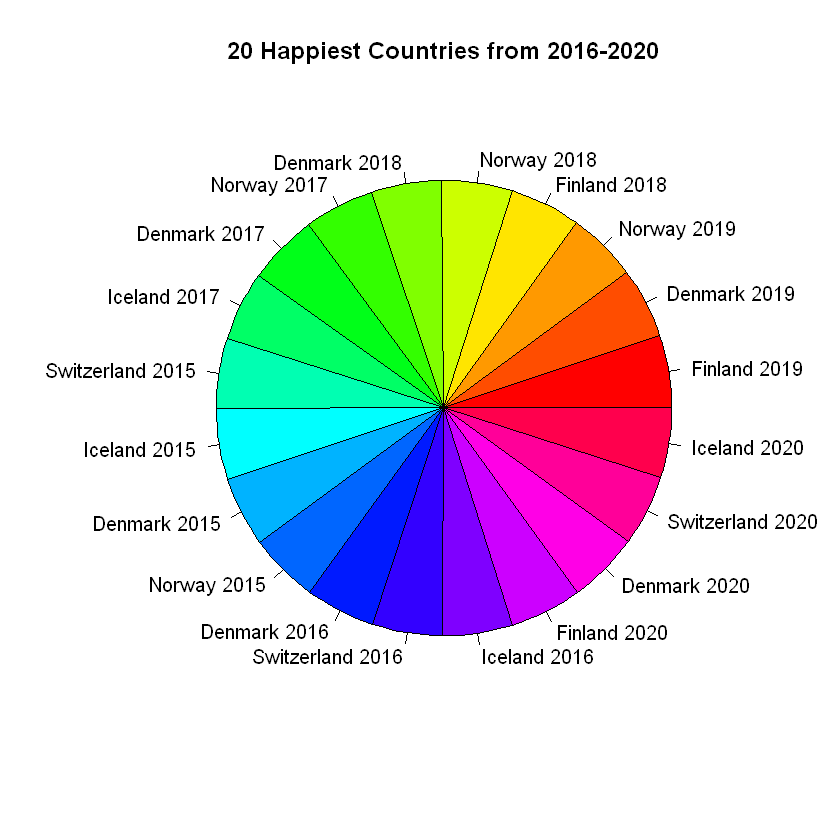

In [50]:
year <-Happiest_Countries$Year

pie(Happiest_Countries$Happiness.Score,
    labels = paste(Happiest_Countries$Country, sep = " ", year), 
    col = rainbow(length(Happiest_Countries$Year)), 
    main = "20 Happiest Countries from 2016-2020")

# Data Cleaning:
 During the data cleaning phase, we removed rows that were empty. There were no N/A or black rows, so the na.omit() code was removed. Then we removed columns that were consistent through each dataset and renamed the columns in all of the data frames for consistency. 

# Adaptation:
For the adaption phase, we created two additional data columns. The first new column that was added was the year the countries were scores. The second new column we created was a numeric representation of the countries to use in our correlations and visualizations. 

# Correlations

In [37]:
cor(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$Health.Life.Expectancy)

[1] 0.07402844

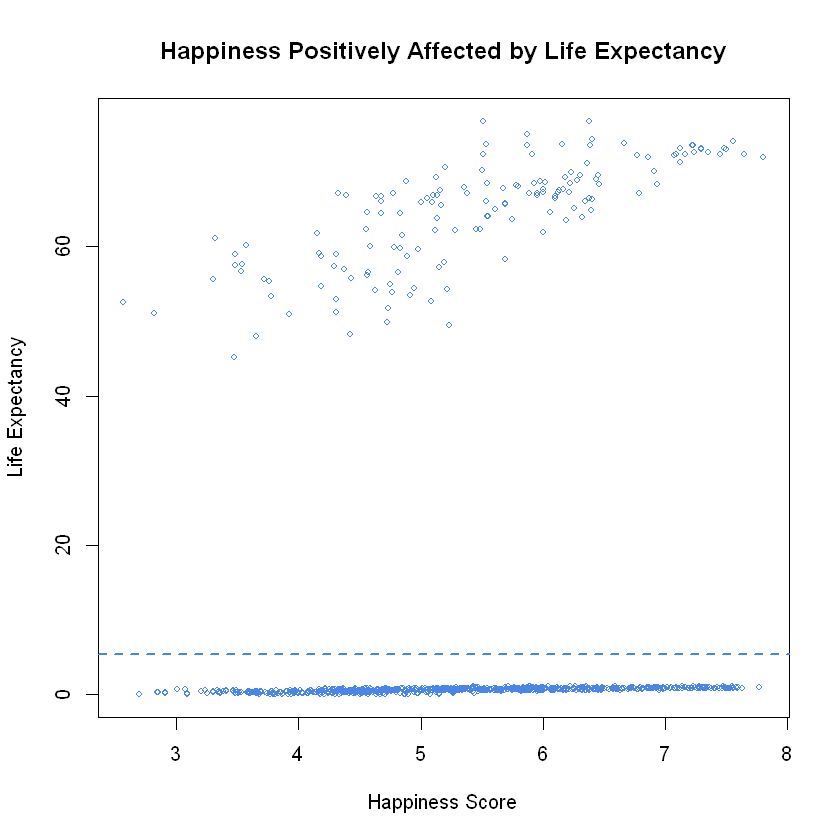

In [38]:
### As you can see there is less correlation between Happiness Score and Life Expectancy.
x=World_Happiness_correlations$Happiness.Score
y=World_Happiness_correlations$Health.Life.Expectancy
fit=lm(x~y)
plot(x, y,
     main = "Happiness Positively Affected by Life Expectancy",cex=0.7,
     xlab = "Happiness Score",
     ylab = "Life Expectancy",
     col = "#4a86e8")
     abline(coefficients(fit), lwd=2,lty=2, col = "#4a86e8")

In [39]:
cor(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$GDP.Per.Capita)

[1] 0.1630692

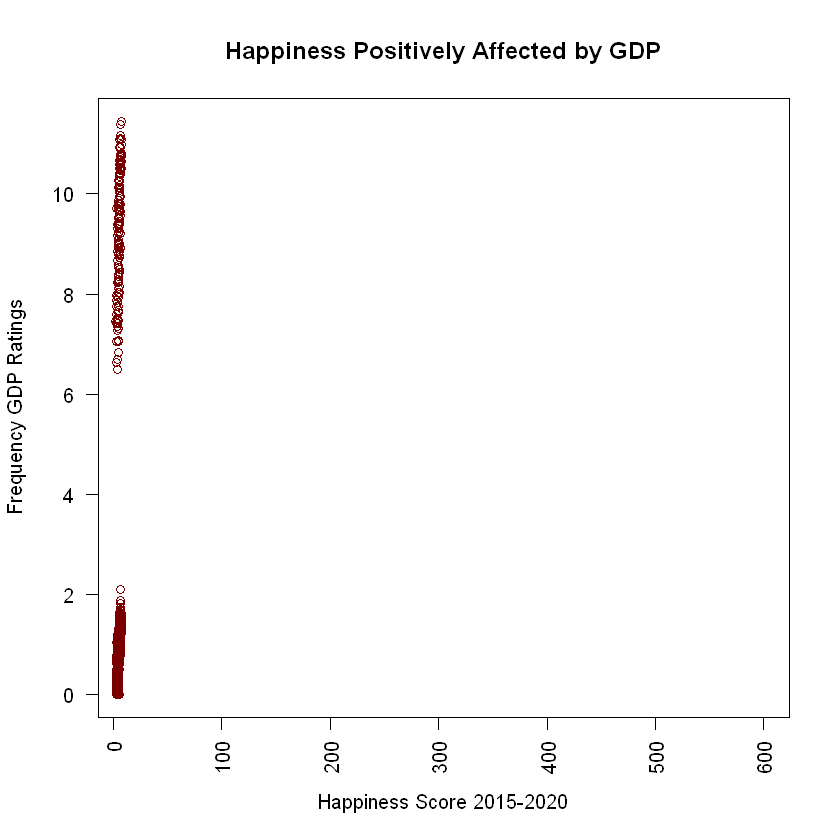

In [40]:
plot(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$GDP.Per.Capita, pch=21, main="Happiness Positively Affected by GDP", xlab= "Happiness Score 2015-2020", ylab ="Frequency GDP Ratings", col= "#7A0000", las=2, xlim=c(10,600))

In [41]:
cor(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$Freedom.to.Make.Life.Choices)

[1] 0.4262913

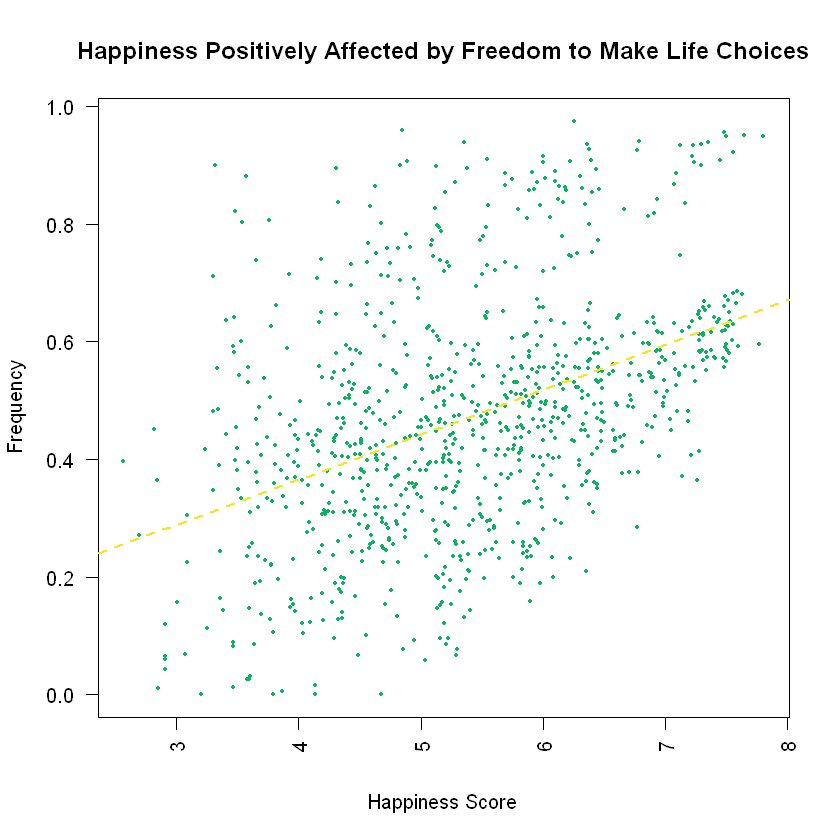

In [42]:
## There is a positive correlation in this graph

x <- World_Happiness_correlations$Happiness.Score
y <- World_Happiness_correlations$Freedom.to.Make.Life.Choices
fit <- lm(y ~ x)
plot(x, y, main = "Happiness Positively Affected by Freedom to Make Life Choices", cex=0.4, las=2,
     xlab = "Happiness Score", ylab = "Frequency",
     pch = 19, col="#0CB262")
abline(coefficients(fit), lwd=2,lty=2, col = "#F7E61B")

In [43]:
cor(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$Generosity)

[1] 0.08517216

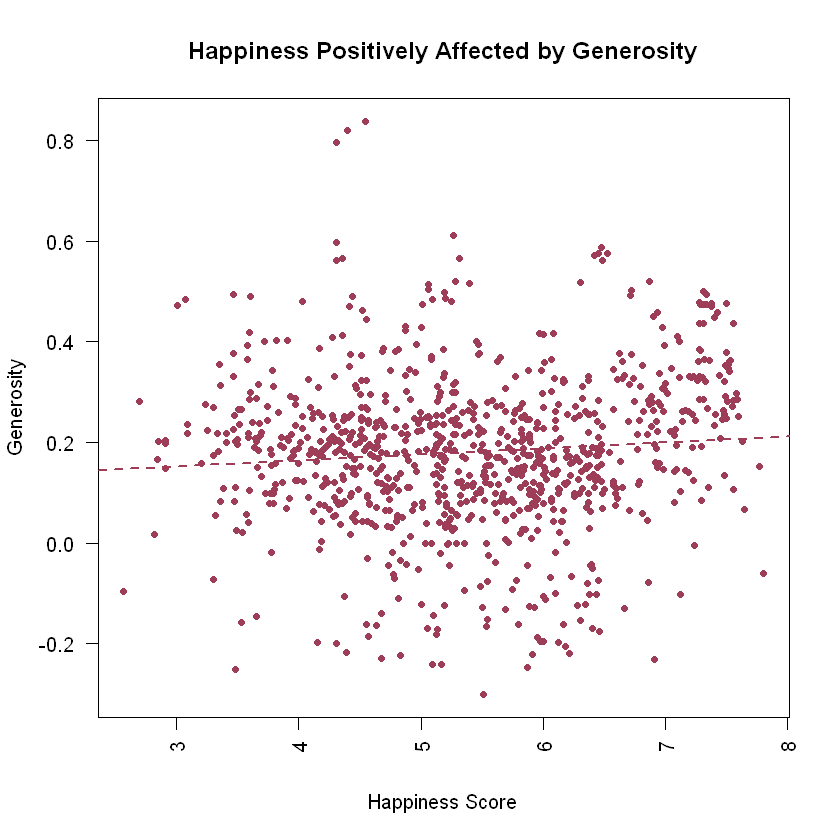

In [44]:
x <- World_Happiness_correlations$Happiness.Score
y <- World_Happiness_correlations$Generosity
fit <- lm(y ~ x)
plot(x, y, main = "Happiness Positively Affected by Generosity", cex=.80, las=2,
     xlab = "Happiness Score", ylab = "Generosity",
     pch = 19, col="#9E3D58")
abline(coefficients(fit), lwd=2,lty=2, col = "#9E3D58")

In [45]:
cor(World_Happiness_correlations$Happiness.Score, World_Happiness_correlations$Perceptions.of.Corruption)

[1] 0.1188344

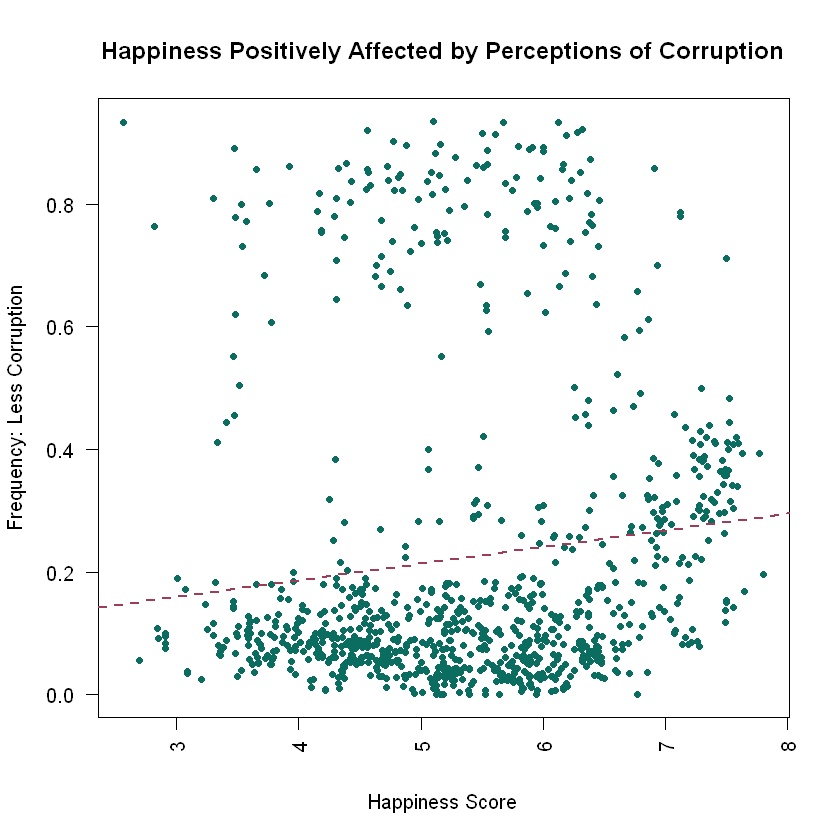

In [46]:
x <- World_Happiness_correlations$Happiness.Score
y <- World_Happiness_correlations$Perceptions.of.Corruption
fit <- lm(y ~ x)
plot(x, y, main = "Happiness Positively Affected by Perceptions of Corruption", cex=.80, las=2,
     xlab = "Happiness Score", ylab = "Frequency: Less Corruption",
     pch = 19, col="#0A6D5F")
abline(coefficients(fit), lwd=2,lty=2, col = "#9E3D58")

In [47]:
##The year does not impact the  happiness score
cor(World_Happiness_correlations$Year, World_Happiness_correlations$Happiness.Score)

[1] 0.02510802

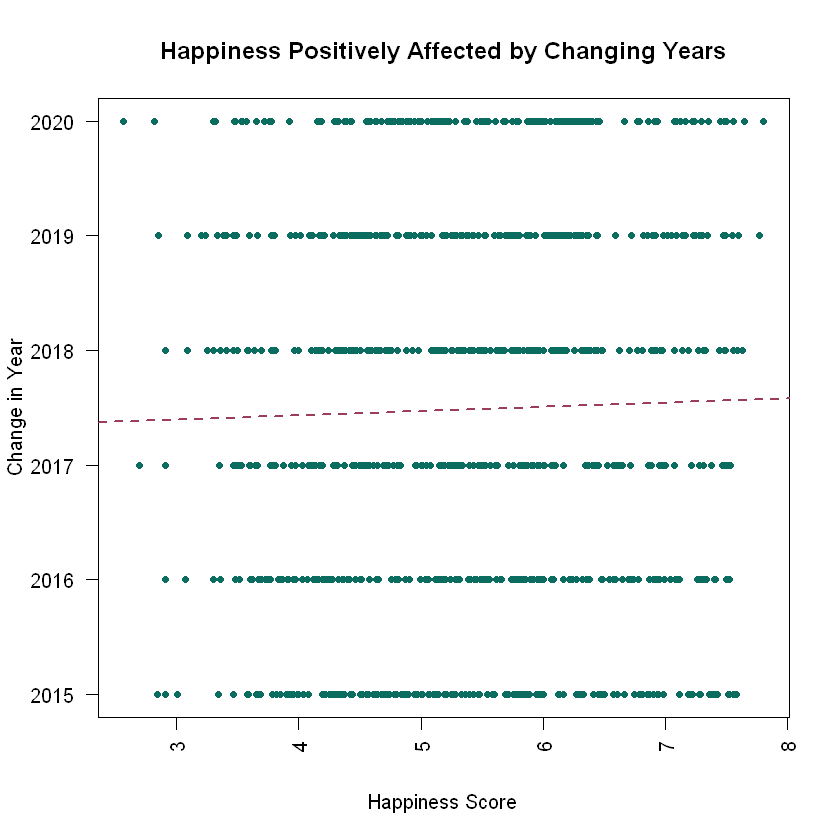

In [48]:
x <- World_Happiness_correlations$Happiness.Score
y <- World_Happiness_correlations$Year
fit <- lm(y ~ x)
plot(x, y, main = "Happiness Positively Affected by Changing Years", cex=.80, las=2,
     xlab = "Happiness Score", ylab = "Change in Year",
     pch = 19, col="#0A6D5F")
abline(coefficients(fit), lwd=2,lty=2, col = "#9E3D58")

# Examined by Year

In [53]:
cor(World_Happiness_2020$Happiness.Score, World_Happiness_2020$GDP.Per.Capita)

[1] 0.7753744

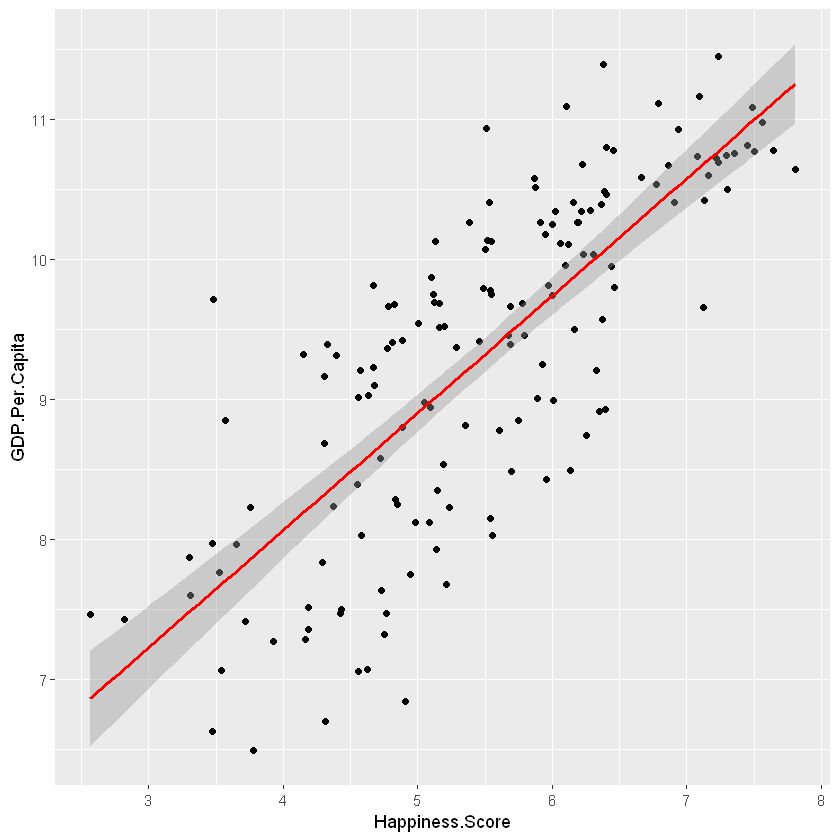

In [54]:
ggplot(World_Happiness_2020, aes(x = Happiness.Score, y = GDP.Per.Capita)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [94]:
cor(World_Happiness_2020$Happiness.Score, World_Happiness_2020$Freedom.to.Make.Life.Choices)

[1] 0.5905968

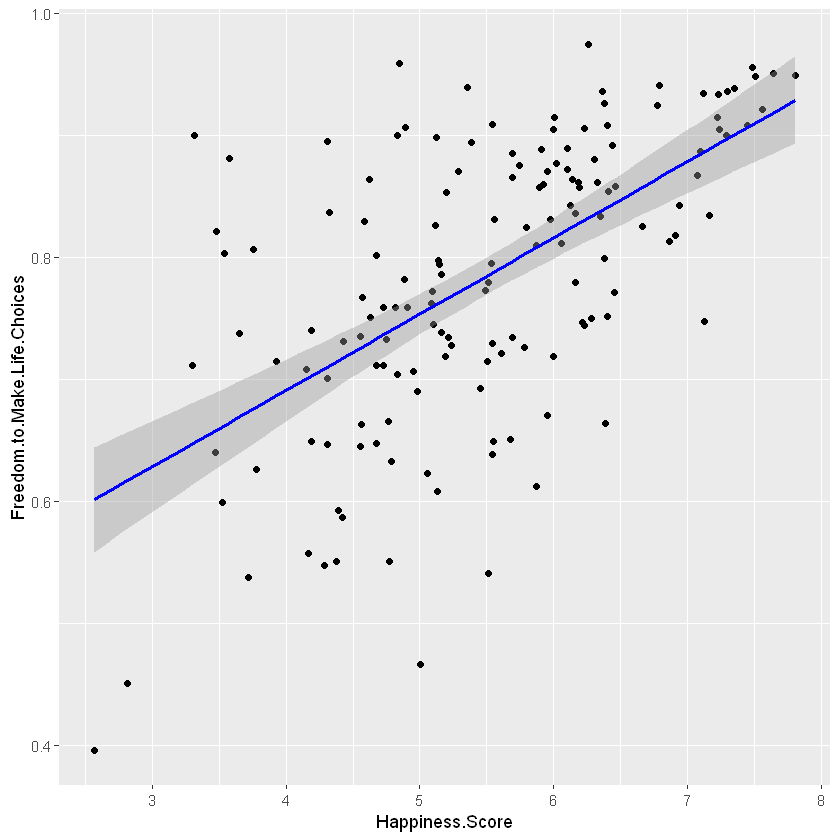

In [55]:
ggplot(World_Happiness_2020, aes(x = Happiness.Score, y = Freedom.to.Make.Life.Choices)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "blue")

In [95]:
cor(World_Happiness_2020$Happiness.Score, World_Happiness_2020$Perceptions.of.Corruption)

[1] -0.4183051

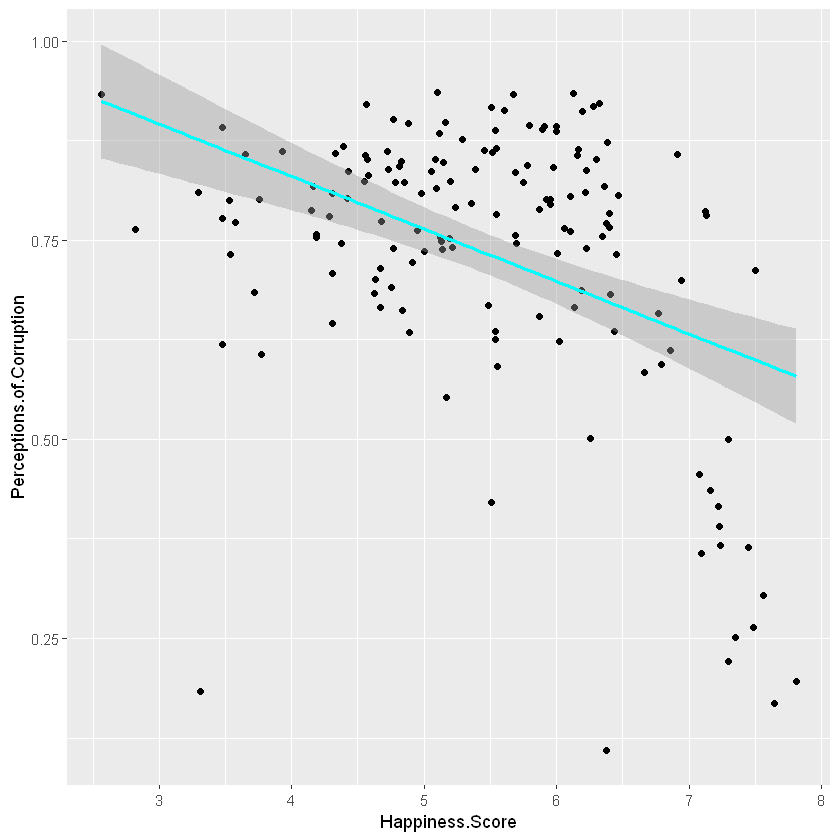

In [56]:
### It is a negative Correlation between happiness score to perceptions of Corruption 
ggplot(World_Happiness_2020, aes(x = Happiness.Score, y = Perceptions.of.Corruption)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "Cyan")

In [96]:
cor(World_Happiness_2019$Happiness.Score, World_Happiness_2019$GDP.Per.Capita)

[1] 0.7938829

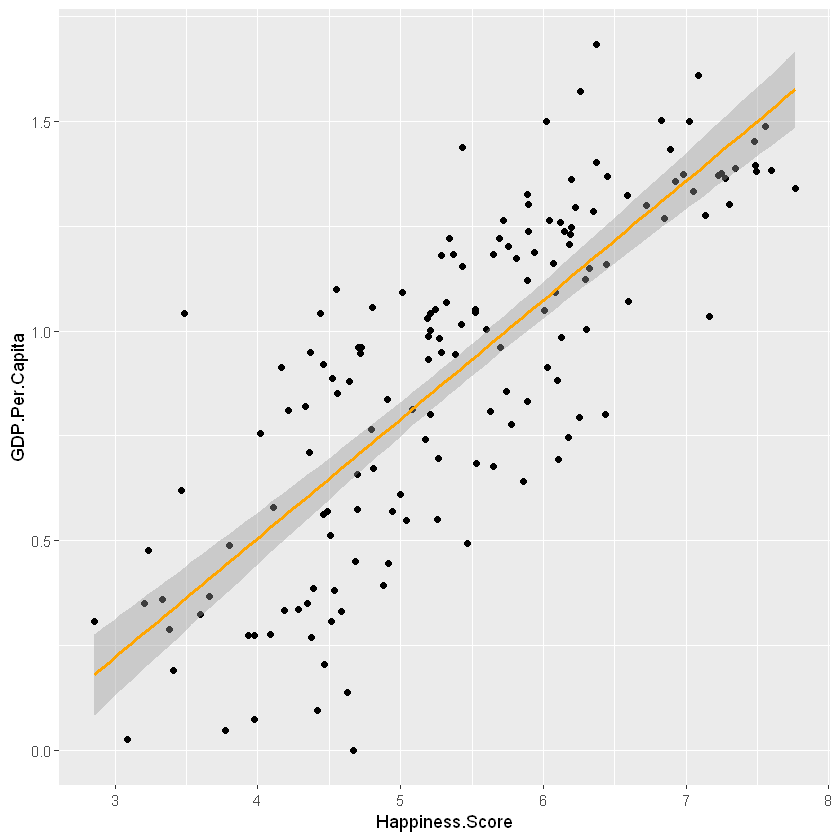

In [57]:
ggplot(World_Happiness_2019, aes(x = Happiness.Score, y = GDP.Per.Capita)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "Orange")

In [97]:
cor(World_Happiness_2019$Happiness.Score, World_Happiness_2019$Freedom.to.Make.Life.Choices)

[1] 0.5667418

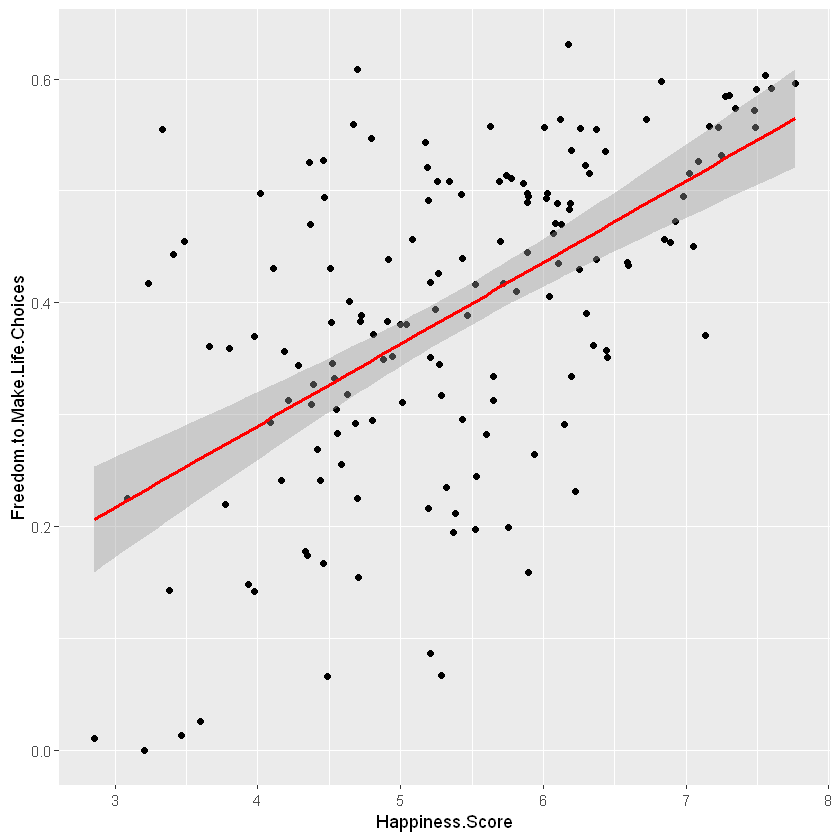

In [58]:
ggplot(World_Happiness_2019, aes(x = Happiness.Score, y = Freedom.to.Make.Life.Choices)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [98]:
cor(World_Happiness_2019$Happiness.Score, World_Happiness_2019$Perceptions.of.Corruption)

[1] 0.3856131

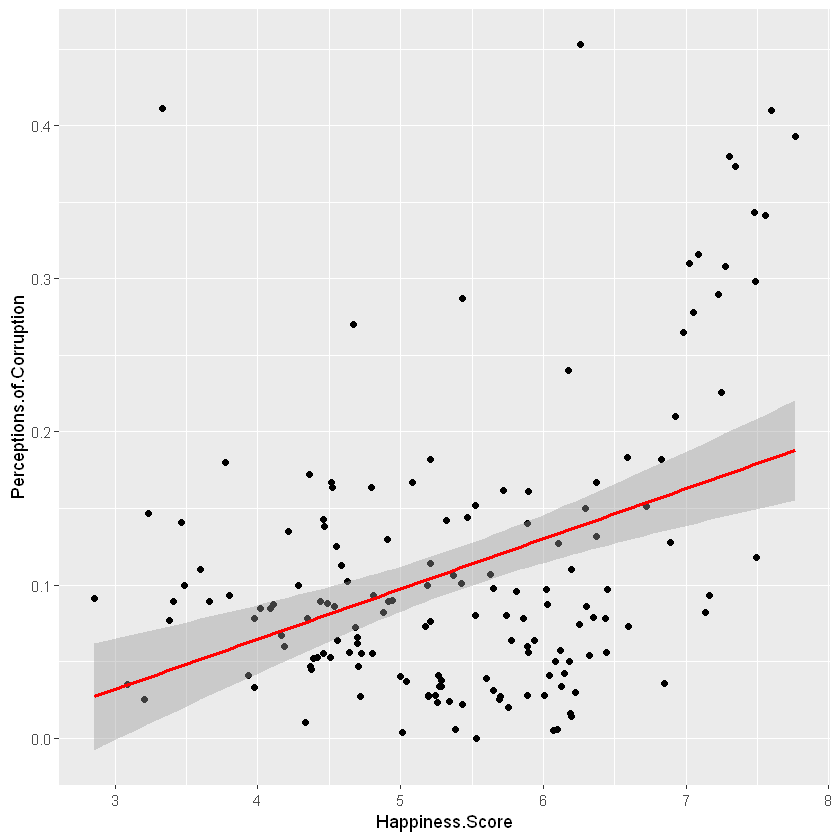

In [59]:
ggplot(World_Happiness_2019, aes(x = Happiness.Score, y = Perceptions.of.Corruption)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [99]:
cor(World_Happiness_2018$Happiness.Score, World_Happiness_2018$GDP.Per.Capita)

[1] 0.8021239

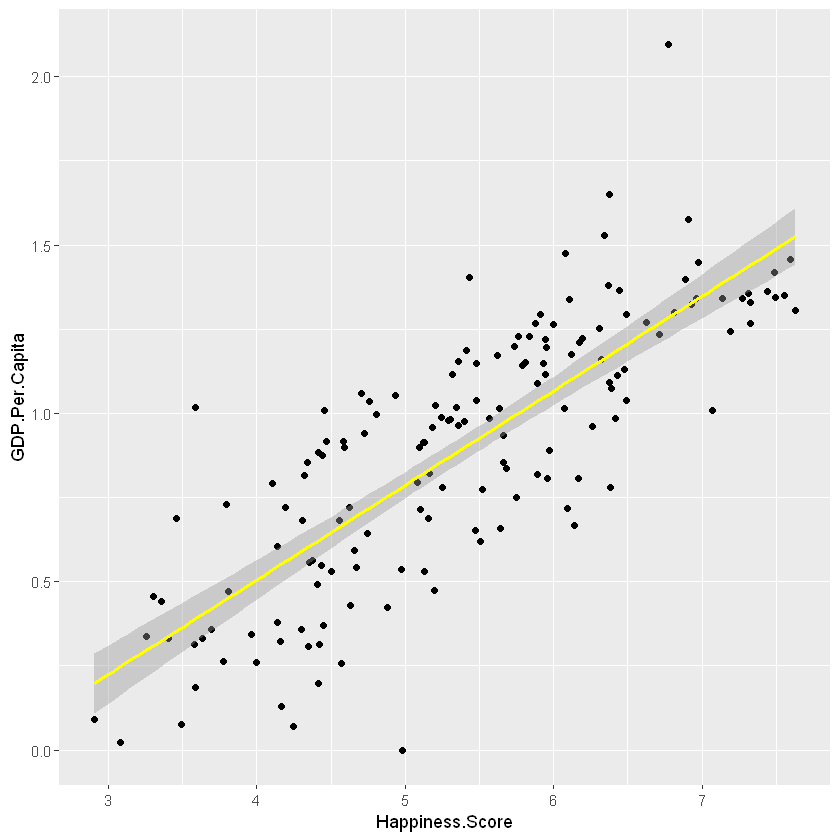

In [60]:
ggplot(World_Happiness_2018, aes(x = Happiness.Score, y = GDP.Per.Capita)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "yellow")

In [100]:
cor(World_Happiness_2018$Happiness.Score, World_Happiness_2018$Freedom.to.Make.Life.Choices)

[1] 0.5442799

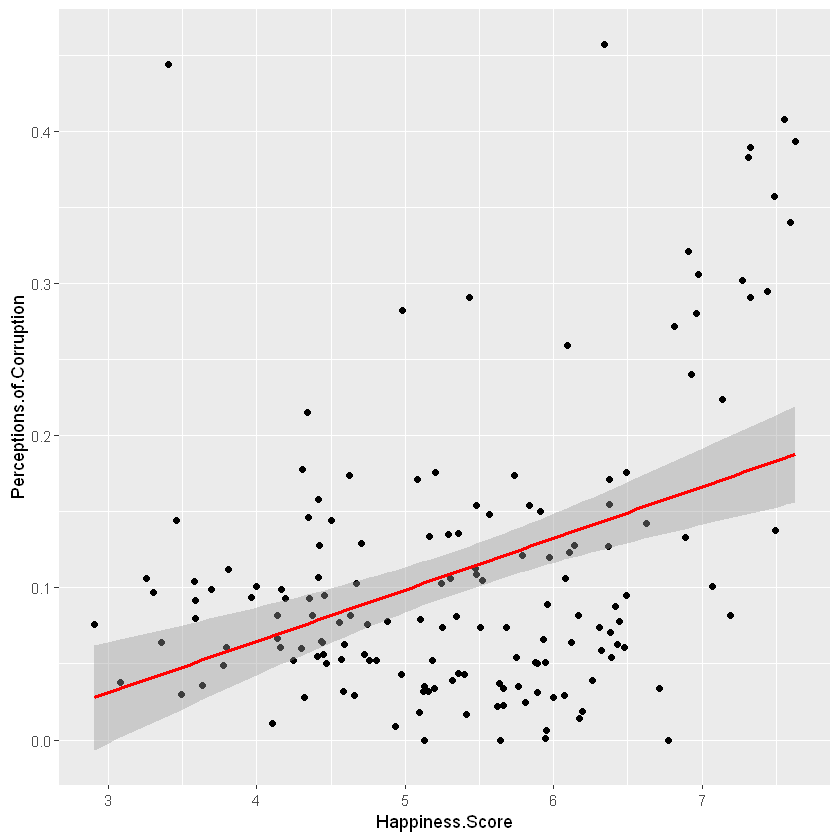

In [61]:
ggplot(World_Happiness_2018, aes(x = Happiness.Score, y = Perceptions.of.Corruption)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [101]:
cor(World_Happiness_2018$Happiness.Score, World_Happiness_2018$Perceptions.of.Corruption)

[1] 0.3921512

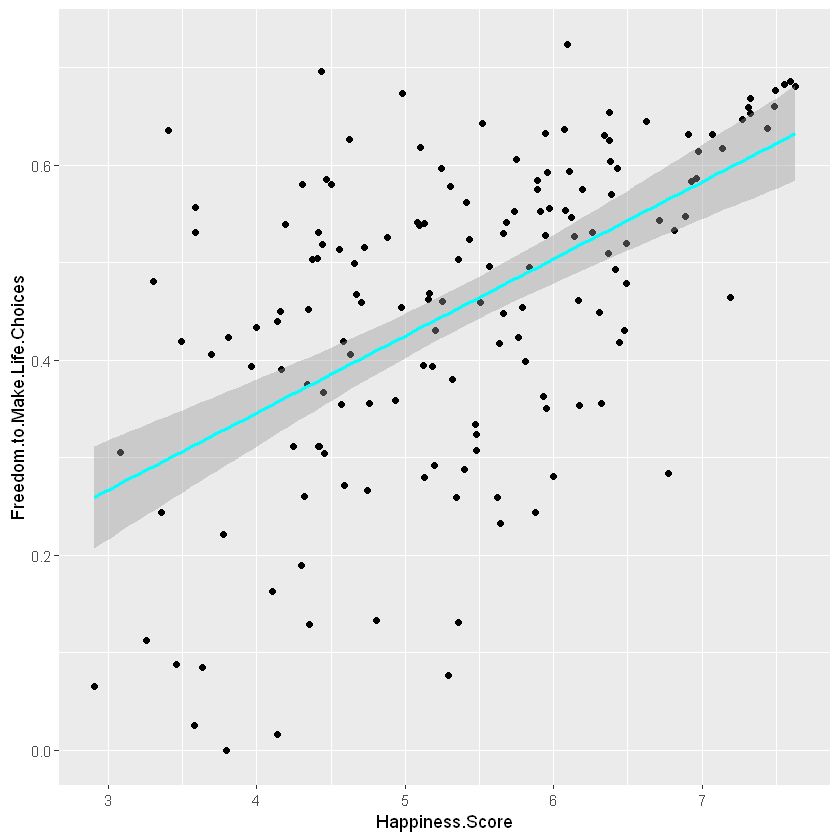

In [62]:
ggplot(World_Happiness_2018, aes(x = Happiness.Score, y = Freedom.to.Make.Life.Choices)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "cyan")

In [102]:
cor(World_Happiness_2017$Happiness.Score, World_Happiness_2017$GDP.Per.Capita)

[1] 0.8124688

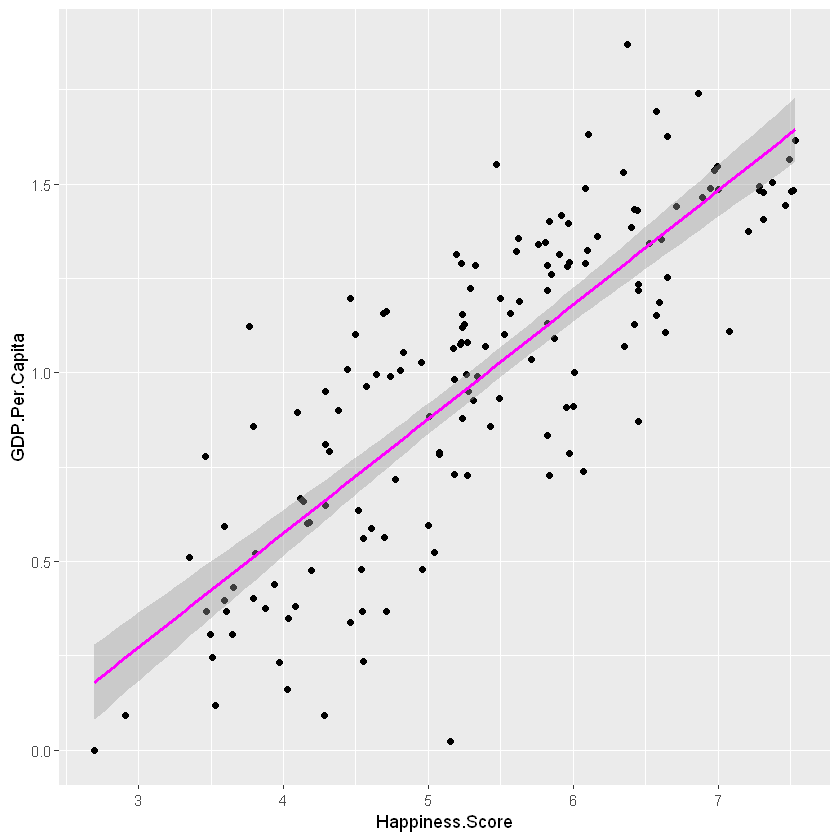

In [63]:
ggplot(World_Happiness_2017, aes(x = Happiness.Score, y = GDP.Per.Capita)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "magenta")

In [103]:
cor(World_Happiness_2017$Happiness.Score, World_Happiness_2017$Freedom.to.Make.Life.Choices)

[1] 0.5701372

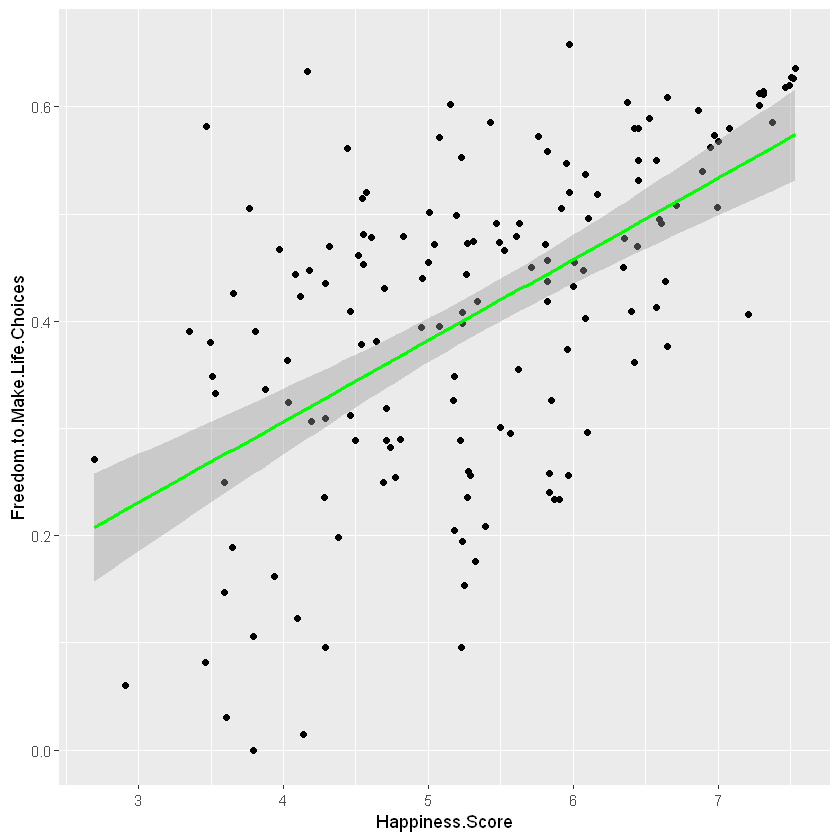

In [64]:
ggplot(World_Happiness_2017, aes(x = Happiness.Score, y = Freedom.to.Make.Life.Choices)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "Green")

In [104]:
cor(World_Happiness_2017$Happiness.Score, World_Happiness_2017$Perceptions.of.Corruption)

[1] 0.4290797

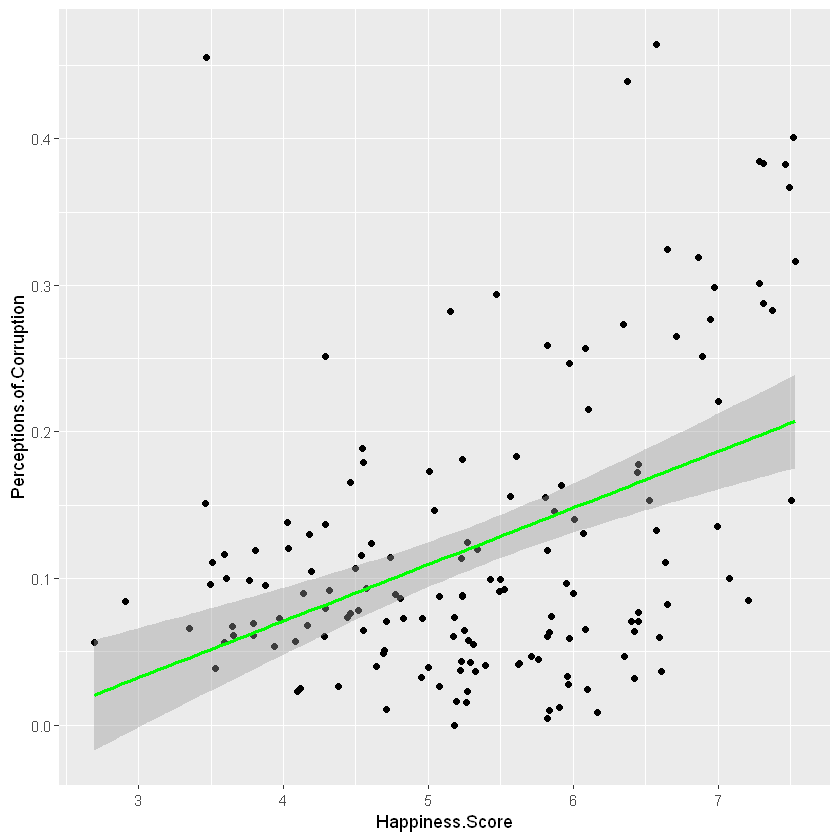

In [65]:
ggplot(World_Happiness_2017, aes(x = Happiness.Score, y = Perceptions.of.Corruption)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "Green")

# Examined by Top Happiest

In [105]:
cor(Happiest_Countries$Happiness.Score, Happiest_Countries$GDP.Per.Capita)

[1] 0.3146094

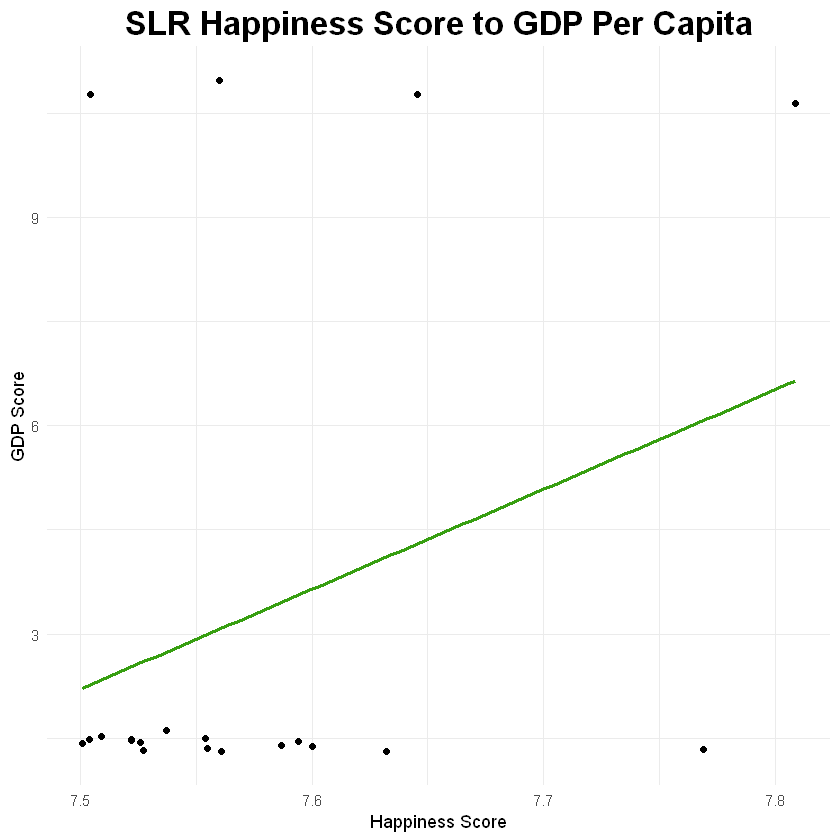

In [81]:
ggplot(Happiest_Countries,aes(Happiest_Countries$Happiness.Score, Happiest_Countries$GDP.Per.Capita)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='#379F11') +
  theme_minimal() +
  labs(x='Happiness Score', y='GDP Score', title='SLR Happiness Score to GDP Per Capita') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

In [106]:
cor(Happiest_Countries$Happiness.Score, Happiest_Countries$Freedom.to.Make.Life.Choices)

[1] 0.3420162

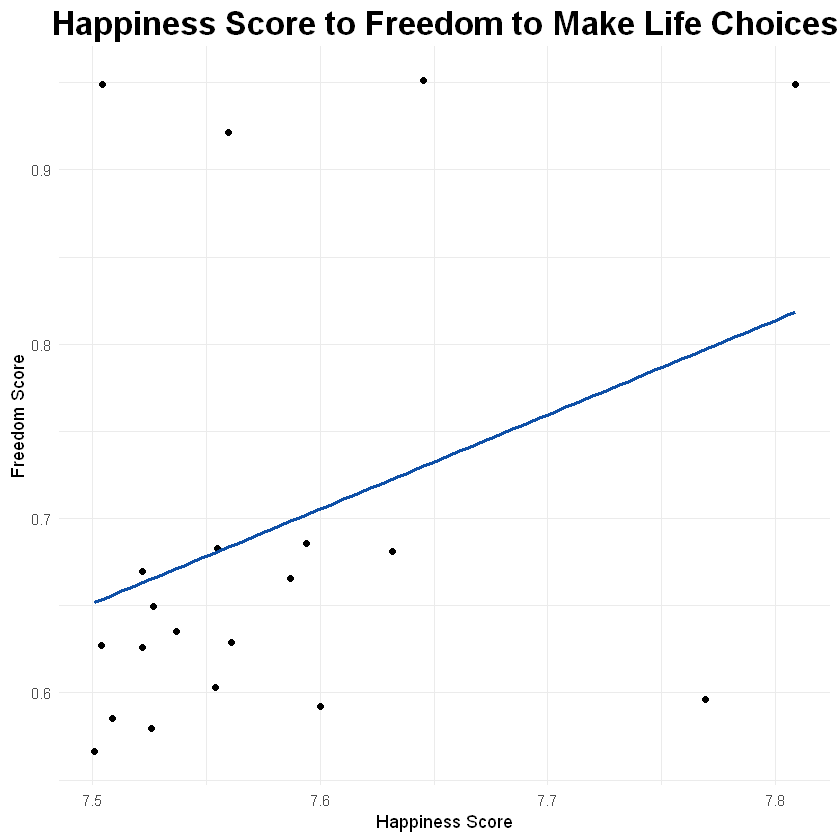

In [82]:
ggplot(Happiest_Countries,aes(Happiest_Countries$Happiness.Score, Happiest_Countries$Freedom.to.Make.Life.Choices)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='#0F50A7') +
  theme_minimal() +
  labs(x='Happiness Score', y='Freedom Score', title='Happiness Score to Freedom to Make Life Choices') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

In [107]:
cor(Happiest_Countries$Happiness.Score, Happiest_Countries$Health.Life.Expectancy)

[1] 0.3224825

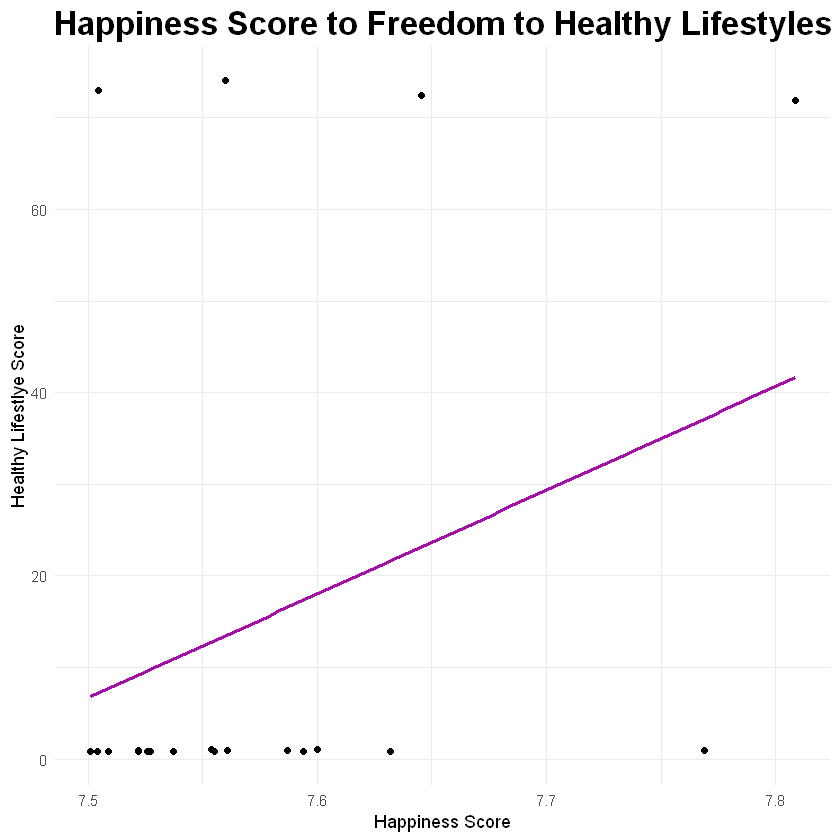

In [83]:
ggplot(Happiest_Countries,aes(Happiest_Countries$Happiness.Score, Happiest_Countries$Health.Life.Expectancy)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='#A40FA7') +
  theme_minimal() +
  labs(x='Happiness Score', y='Healthy Lifestlye Score', title='Happiness Score to Freedom to Healthy Lifestyles') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

In [108]:
cor(Happiest_Countries$Happiness.Score, Happiest_Countries$Generosity)

[1] -0.776445

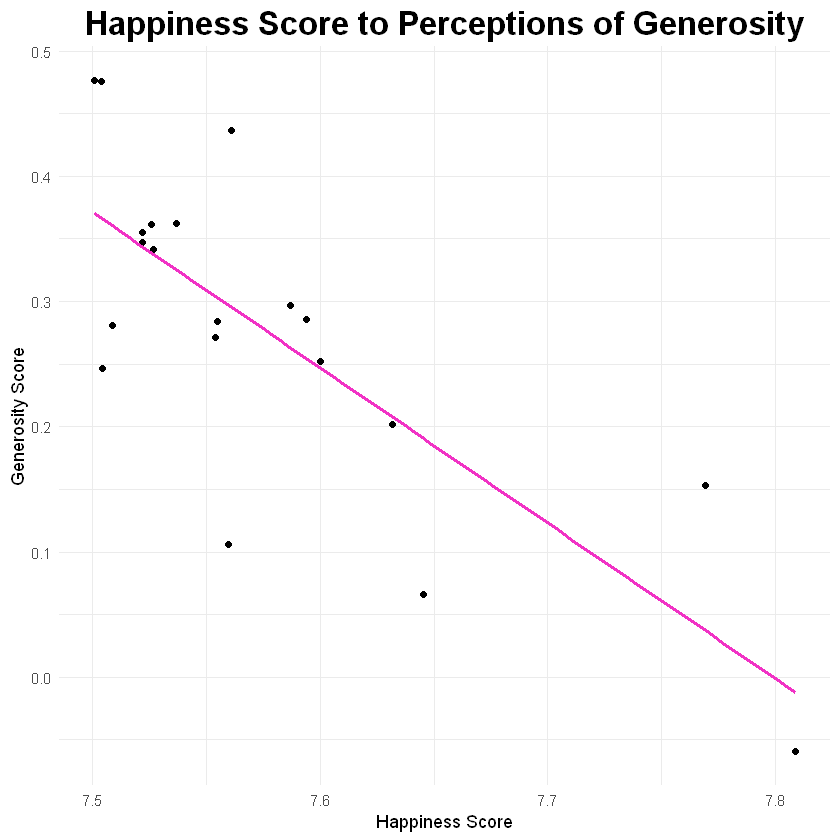

In [85]:
ggplot(Happiest_Countries,aes(Happiest_Countries$Happiness.Score, Happiest_Countries$Generosity)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='#F132C5') +
  theme_minimal() +
  labs(x='Happiness Score', y='Generosity Score', title='Happiness Score to Perceptions of Generosity') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

In [56]:
cor(Happiest_Countries$Happiness.Score, Happiest_Countries$Perceptions.of.Corruption)

[1] -0.2146203

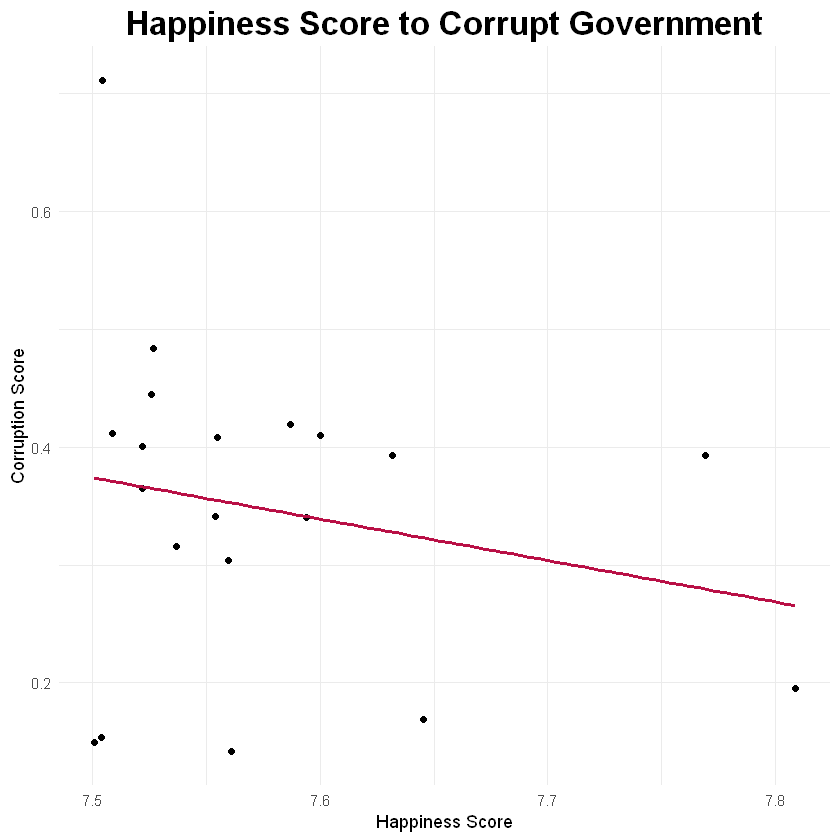

In [86]:
ggplot(Happiest_Countries,aes(Happiest_Countries$Happiness.Score, Happiest_Countries$Perceptions.of.Corruption)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='#B91046') +
  theme_minimal() +
  labs(x='Happiness Score', y='Corruption Score', title='Happiness Score to Corrupt Government') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

# Multiple Linear Regression

In [88]:
multiple.regress <- lm(World_Happiness_correlations$Happiness.Score ~ World_Happiness_correlations$GDP.Per.Capita + World_Happiness_correlations$Freedom.to.Make.Life.Choices, data = World_Happiness_correlations)
summary(multiple.regress)


Call:
lm(formula = World_Happiness_correlations$Happiness.Score ~ World_Happiness_correlations$GDP.Per.Capita + 
    World_Happiness_correlations$Freedom.to.Make.Life.Choices, 
    data = World_Happiness_correlations)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.04553 -0.71739  0.02871  0.79937  2.15376 

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                                3.97157    0.09342
World_Happiness_correlations$GDP.Per.Capita               -0.10153    0.01465
World_Happiness_correlations$Freedom.to.Make.Life.Choices  3.50652    0.22931
                                                          t value Pr(>|t|)    
(Intercept)                                                42.515  < 2e-16 ***
World_Happiness_correlations$GDP.Per.Capita                -6.931 7.79e-12 ***
World_Happiness_correlations$Freedom.to.Make.Life.Choices  15.292  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 

In [89]:
install.packages ("scatterplot3d")

package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sandy\AppData\Local\Temp\RtmpEv42sj\downloaded_packages


In [90]:
library ('scatterplot3d')

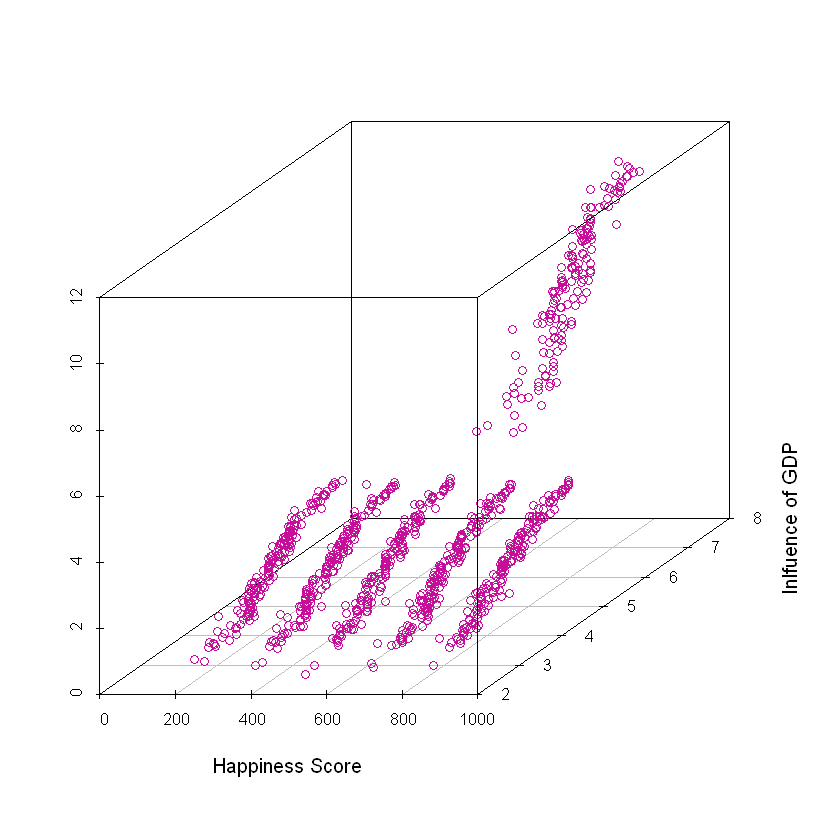

In [91]:
##Obvious positive correlation between a country's Happiness Score and GDP
scatterplot3d(World_Happiness_correlations$Happiness.Score, y=World_Happiness_correlations$GDP.Per.Capita,color="#C70E9A", xlab="Happiness Score", ylab="Inlfuence of GDP")

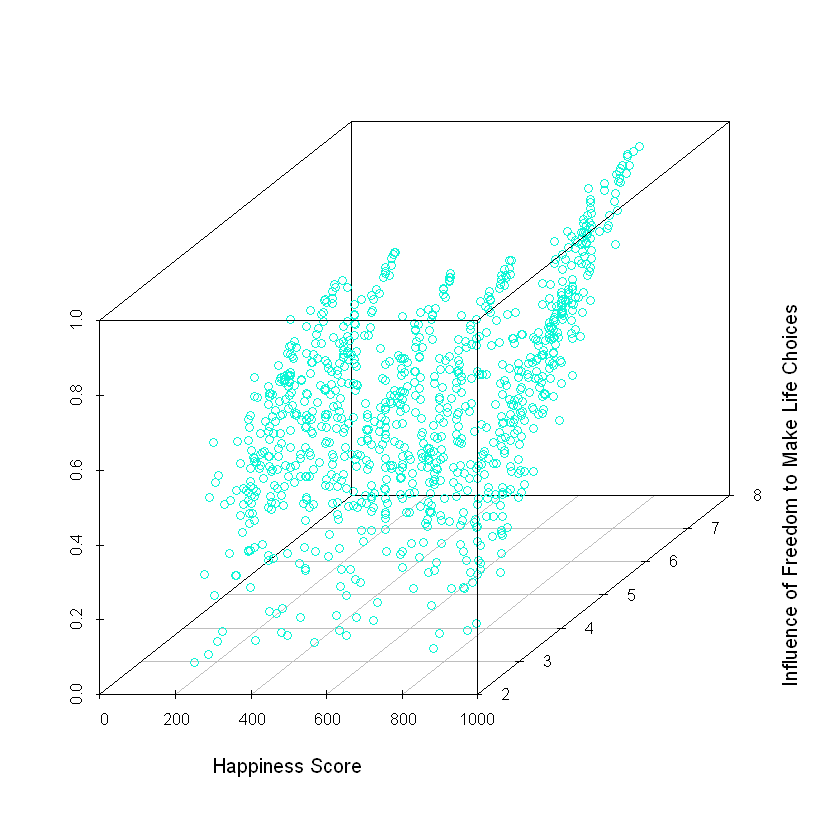

In [105]:
##Obvious positive correlation between a country's Happiness Score and Freedom to Make Life Choices

scatterplot3d(World_Happiness_correlations$Happiness.Score, y=World_Happiness_correlations$Freedom.to.Make.Life.Choices, color="#0EF6D6", xlab="Happiness Score", ylab="Influence of Freedom to Make Life Choices")

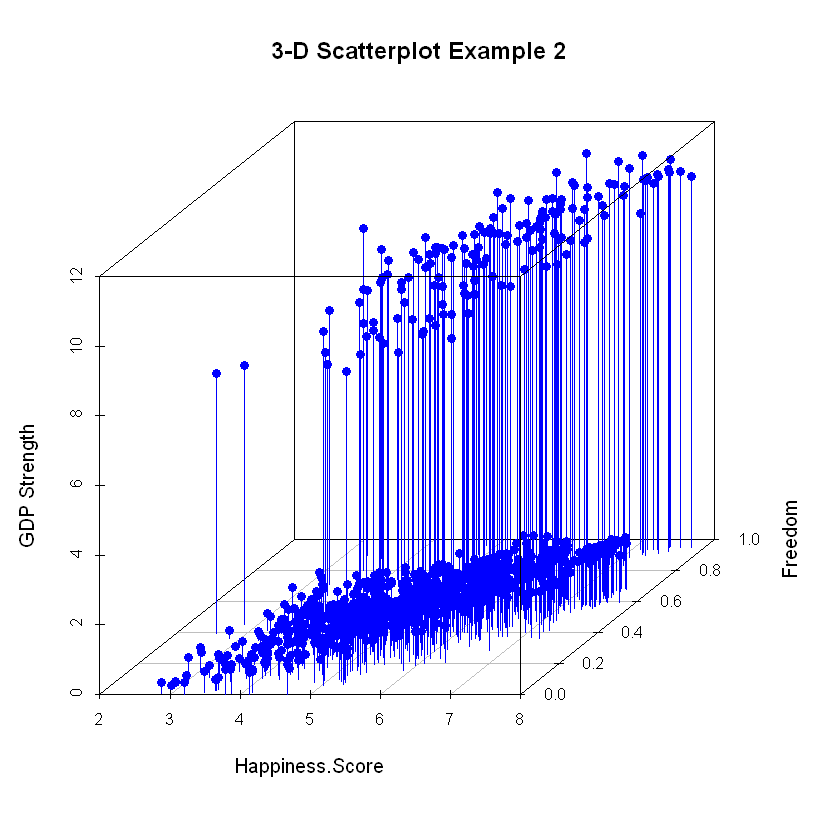

In [112]:
##Visual correlation of Multiple Linear Regression of the Happiness Score of All Countries as influenced
## by citizens' ability to make choices & strong GDP
with(World_Happiness_correlations, {
   scatterplot3d(x= World_Happiness_correlations$Happiness.Score, y= World_Happiness_correlations$Freedom.to.Make.Life.Choices, z= World_Happiness_correlations$GDP.Per.Capita,       
                 color="blue", pch=19, # filled blue circles
                 type="h",             # lines to the horizontal plane
                 main="3-D Scatterplot Example 2",
                 xlab="Happiness.Score",
                 ylab="Freedom",
                 zlab="GDP Strength")
})

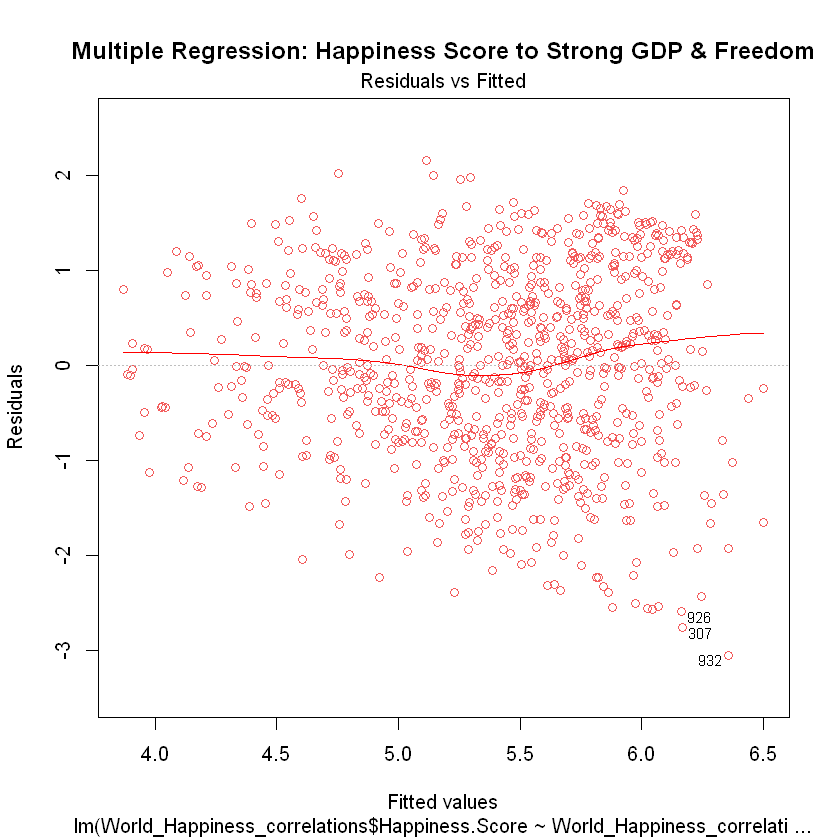

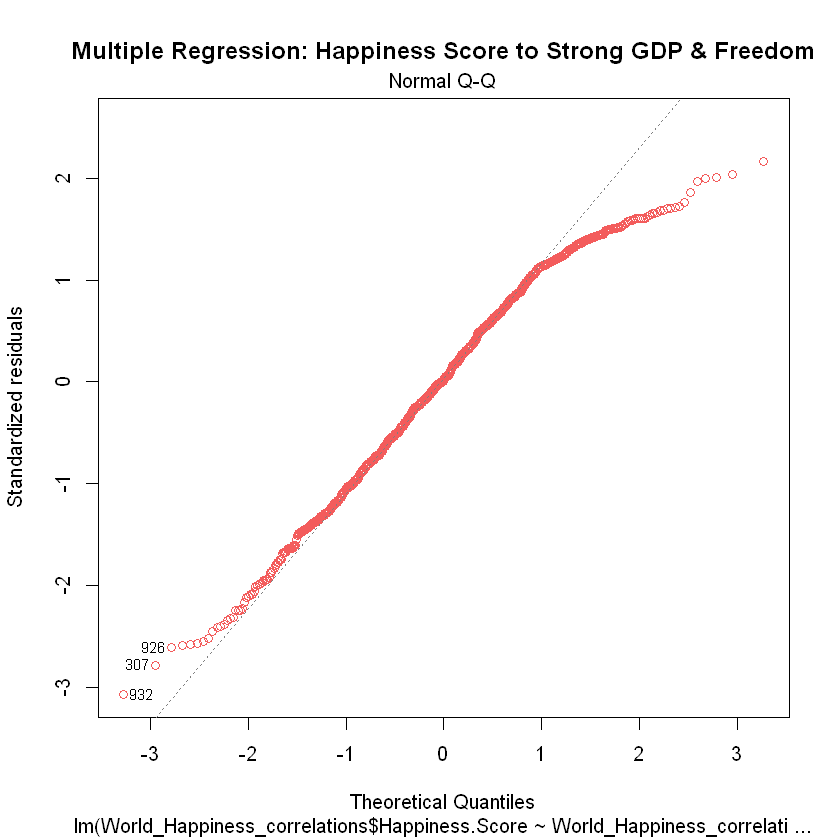

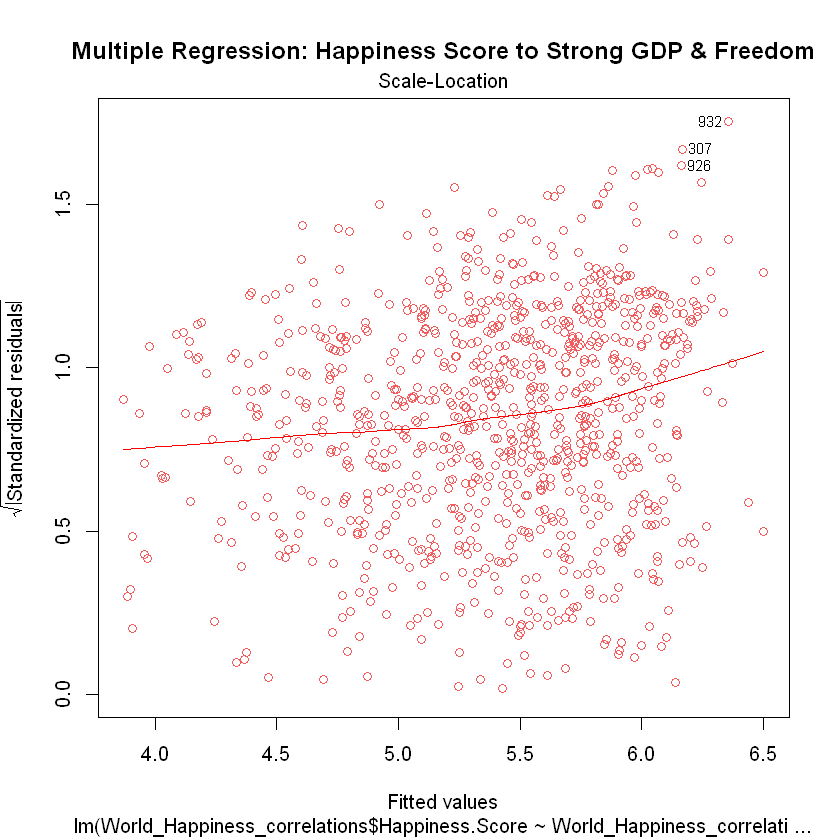

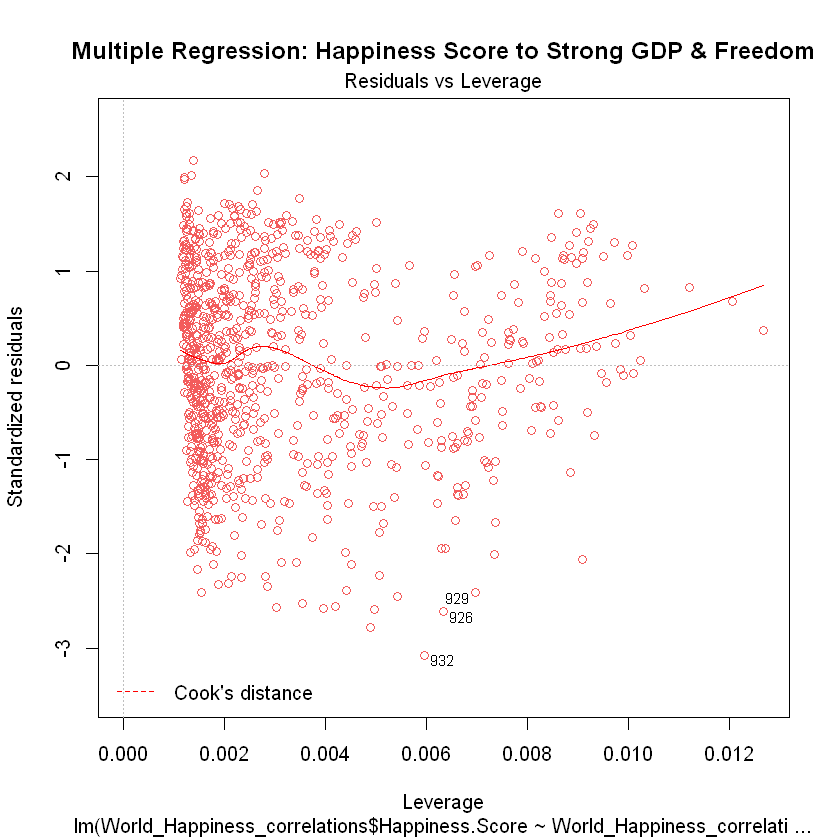

In [100]:
plot(multiple.regress, col="#F35C5C", main= "Multiple Regression: Happiness Score to Strong GDP & Freedom")

# Correlations of Least Happiest Countries
To aid in our report, we correlated the affect of the given variables on the Happiness Score of the the "Least Happy Countries". Any country that scored below 3.5 in Happiness Score is considered to have more less happy citizens above other countries. We will use the results of the correlations in the report section and compare it to the values from the "Happiest Countries".

In [159]:
Least_Happiest_Countries <- subset(World_Happiness_correlations, World_Happiness_correlations$Happiness.Score>=0 & World_Happiness_correlations$Happiness.Score<3.5)

In [160]:
head(Least_Happiest_Countries, 10)

,Country,Happiness.Score,GDP.Per.Capita,Health.Life.Expectancy,Freedom.to.Make.Life.Choices,Generosity,Perceptions.of.Corruption,Year
148,Botswana,3.488,1.041,0.538,0.455,0.025,0.100,2019
149,Syria,3.462,0.619,0.440,0.013,0.331,0.141,2019
150,Malawi,3.410,0.191,0.495,0.443,0.218,0.089,2019
151,Yemen,3.380,0.287,0.463,0.143,0.108,0.077,2019
152,Rwanda,3.334,0.359,0.614,0.555,0.217,0.411,2019
153,Tanzania,3.231,0.476,0.499,0.417,0.276,0.147,2019
154,Afghanistan,3.203,0.350,0.361,0.000,0.158,0.025,2019
155,Central African Republic,3.083,0.026,0.105,0.225,0.235,0.035,2019
156,South Sudan,2.853,0.306,0.295,0.010,0.202,0.091,2019
305,Liberia,3.495,0.076,0.267,0.419,0.206,0.030,2018


In [161]:
cor(Least_Happiest_Countries$Happiness.Score, Least_Happiest_Countries$Perceptions.of.Corruption)

[1] 0.007318271

In [162]:
cor(Least_Happiest_Countries$Happiness.Score, Least_Happiest_Countries$Health.Life.Expectancy)

[1] -0.03008127

In [163]:
cor(Least_Happiest_Countries$Happiness.Score, Least_Happiest_Countries$Generosity)

[1] 0.05002254

In [164]:
cor(Least_Happiest_Countries$Happiness.Score, Least_Happiest_Countries$GDP.Per.Capita)

[1] 0.004803697

In [165]:
cor(Least_Happiest_Countries$Happiness.Score, Least_Happiest_Countries$Freedom.to.Make.Life.Choices)

[1] 0.3885504

# Project Report:
This reported provided data about the "happiest" countries for the The World Tourism Organization (UNWTO) to use for their marketing campaigns for the years 2021-2022. UNWTO is the United Nations specialized agency entrusted with the promotion of responsible, sustainable and universally accessible tourism, having its headquarters in Madrid, Spain. It is the leading international organization in the field of tourism, which promotes tourism as a driver of economic growth, inclusive development and environmental sustainability and offers the sector leadership and support in advancing knowledge and tourism policies worldwide. (https://www.unwto.org/, 2021)

The data uncovered several suprising correlations between certain variables and their affects on scoring. For example, over the course of six years, the overall "Happiness Score" was more positively influenced by citizens' perception of the amount of freedom they had to make life choices versus the perception citizens had about the amount of corruption within their governments. According to Who.int, citizens' freedom to make choices refers to the ability to make choices concerning ones' economic freedoms and opportunities, while rejecting rules that inflict poverty and deprivation. The "freedom" score ranked as the highest influence to the "happiness" score in correlations between all of the variables within the dataset including all of the countries, in addition to the datasets only including the "Happiest Countries" and "Least Happiest Countries".


Other variables such as Health Life Expectancy, Gross Domestic Product Value, Generosity Among Citizens, and Perceived Corruption of a Government, all scored much lower in the dataset that included all of the countries as well as the "Least Happiest". However, in the sample dataset that only selected the highest scoring countries, Health Life Expectancy and the GDP were ranked closely to Freedom to Make Life Choices. The reason for this could be the exclusion of several 3rd world countries from the "Happiest Countries" sample dataset.

The reasons for this could be that a higher GDP is a capture of the measurement of a country's economic output. Countries with more valuable or in-demand GDPs have a greater amount of goods and services generated locally, and will generally have a higher standard of living for its citizens. And countries with higher life expectancy also usually have more healthcare and healthy lifestyle options available to its citizens. These two attributes are often lacking in the politcal landscape of less industrialized nations. Another surprising fact is that the perception of generosity among citizens and perceptions of corruption in government organizations influenced the Happiness Score very little each of the three data sets. 


In line with our findings, our recommendation to focus future tourism marketing campaigns around: health and life expectancy, freedom to make choices, and the economic success of a country. These characteristics were the strongest influencers of the "happiness score" top Happiest Countries. Additionally, "Freedom to make Life Choices" was the overall most influencing factor of Happiness throughout each dataset.

(World Health Organization, https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)